<a href="https://colab.research.google.com/github/ThoaaPhann/AI_31_03_2023/blob/main/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#-----------Cifar 100-----------------#

In [118]:
from keras.datasets import cifar100 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np 

In [119]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [120]:
train_images.shape

(50000, 32, 32, 3)

In [121]:
test_images.shape

(10000, 32, 32, 3)

In [122]:
train_labels.shape

(50000, 1)

In [123]:
test_labels.shape

(10000, 1)

In [128]:
train_images = train_images.reshape((50000,32*32*3)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 32*32*3)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(50000, 3072)

In [129]:
train_labels = to_categorical(train_labels, 100) 
test_labels = to_categorical(test_labels, 100)
print(train_labels.shape)
print(test_labels.shape)


(50000, 100)
(10000, 100)


In [130]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(100,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Output_layer (Dense)        (None, 100)               25700     
                                                                 
Total params: 1,730,404
Trainable params: 1,730,404
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 33s 38ms/step - loss: 4.2074 - accuracy: 0.0629
Epoch 2/10
391/391 [==============================] - 14s 36ms/step - loss: 3.7699 - accuracy: 0.1252
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 3.6097 - accuracy: 0.1527
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 3.4910 - accuracy: 0.1747
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 3.4027 - accuracy: 0.1884
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 3.3290 - accuracy: 0.2026
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 3.2671 - accuracy: 0.2126
Epoch 8/10
391/391 [==============================] - 14s 35ms/step - loss: 3.2099 - accuracy: 0.2267
Epoch 9/10
391/391 [==============================] - 14s 35ms/step - loss: 3.1542 - accuracy: 0.2363
Epoch 10/10
391/391 [==============================] - 14s 35ms/step - loss: 3.107

In [132]:
model.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 11s 56ms/step - loss: 3.0087 - accuracy: 0.2643
Epoch 2/20
196/196 [==============================] - 11s 55ms/step - loss: 2.9675 - accuracy: 0.2723
Epoch 3/20
196/196 [==============================] - 11s 55ms/step - loss: 2.9281 - accuracy: 0.2788
Epoch 4/20
196/196 [==============================] - 9s 48ms/step - loss: 2.8945 - accuracy: 0.2875
Epoch 5/20
196/196 [==============================] - 11s 55ms/step - loss: 2.8654 - accuracy: 0.2919
Epoch 6/20
196/196 [==============================] - 11s 55ms/step - loss: 2.8331 - accuracy: 0.2984
Epoch 7/20
196/196 [==============================] - 11s 55ms/step - loss: 2.8021 - accuracy: 0.3033
Epoch 8/20
196/196 [==============================] - 11s 55ms/step - loss: 2.7687 - accuracy: 0.3124
Epoch 9/20
196/196 [==============================] - 10s 49ms/step - loss: 2.7353 - accuracy: 0.3186
Epoch 10/20
196/196 [==============================] - 11s 55ms/step - loss: 2.7143

In [133]:
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Do mat mat :', test_loss)
print('Do chinh xac :', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 3.7931 - accuracy: 0.2016
Do mat mat : 3.793121099472046
Do chinh xac : 0.20160000026226044


In [134]:
class_name = [ "Apple", "Aquarium_fish", "Baby", "Bear", "Beaver", "Bed", "Bee", "Beetle", "Bicycle", "Bottle",
               "Bowl", "Boy", "Bridge", "Bus", "Butterfly", "Camel", "Can", "Castle", "Caterphillar", "Cattle",
               "Chair", "Chimpanzee", "Clock", "Cloud", "Cockroach", "Couch", "Cra", "Croodile", "Cup", "Dinosaur",
               "Dolphin","Elephant", "Flatfish", "Forest", "Fox", "Girl", "Hamster", "House", "Kangaroo", "Keyboard",
               "Lamp", "Lawn_mower", "Leopard", "Lion", "Lizard", "Lobster", "Man", "Maple_tree", "Motorcycle", "Mountain",
               "Mouse", "Mushromm", "Oak_tree", "Orange", "Orchid", "Otter", "Palm_tree", "Pear", "Pickup_truck", "Pine_tree",
               "Plain", "Plate", "Poppy", "Porcupine", "Possum", "Rabit", "Raccoon", "Ray", "Road", "Rocket",
               "Rose", "Sea", "Seal", "Shark", "Shrew", "Skunk", "Skyscraper", "Snail", "Snake", "Spider",
               "Squirrel", "Streetcar", "Sunflower", "Sweet_pepper", "Table", "Tank", "Telephone", "Television", "Tiger", "Tractor",
               "Train", "Trout", "Tulip","Turtle", "Wardrobe", "Whale", "Willow_tree", "Wolf", "Woman","Worm" ]

1/1 [==============================] - 0s 65ms/step


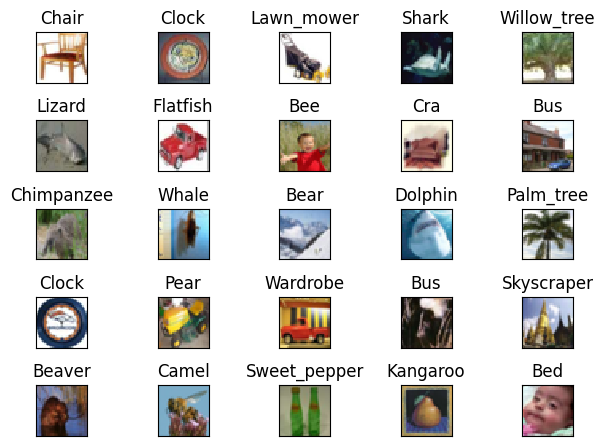

In [135]:
x_images = test_images[30:55]
pred = np.argmax(model.predict(x_images), axis=-1)
x_images = np.reshape(x_images, (25,32,32,3))

for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])